In [33]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

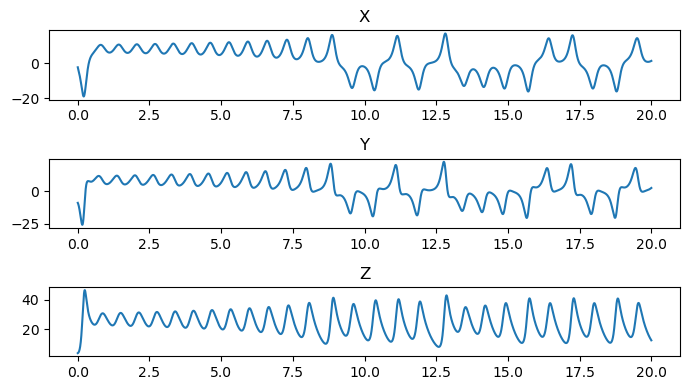

In [34]:
# simulate Lorenz system and plot 

def lorenz(t, state):
    x, y, z = state
    sigma = 10.0
    beta = 8.0 / 3.0
    rho = 28.0
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return np.array([dxdt, dydt, dzdt])

x0 = 10*np.random.randn(3)
t = np.linspace(0, 20, 10000)
sol = solve_ivp(lorenz, [t[0], t[-1]], x0, t_eval=t)

# plot x y z states in separate subplots
fig, axs = plt.subplots(3, 1, figsize=(7, 4))
axs[0].plot(t, sol.y[0])
axs[0].set_title('X')
axs[1].plot(t, sol.y[1])
axs[1].set_title('Y')
axs[2].plot(t, sol.y[2])
axs[2].set_title('Z')
plt.tight_layout()
plt.show()


In [35]:
# verify that DFT coefficient matches direct sum coefficient for one of the state trajectories

xt = sol.y[0] # 0,1,or 2

N = len(t)        # number of samples
T = t[-1]-t[0]    # interval length
dt  = t[1]-t[0]   # time step
k = 40            # Fourier mode index
n = np.arange(N)  # sample indices
omega_k = 2 * np.pi * k / T # corresponding frequency 

# --- Direct sum for coefficient k of Fourier series ---
direct_ck = (1/N) * np.sum(xt * np.exp(-1j * 2*np.pi * k * n  / N))

# --- FFT-based coefficient ---
fft_vals = np.fft.fft(xt)
fft_ck = fft_vals[k] / N
fft_ck_real = np.real(fft_ck)
fft_ck_imag = np.imag(fft_ck)

print("Direct sum Fourier sum coefficient:", direct_ck)
print("FFT-based Fourier sum coefficient: ", fft_ck)
print("Are they equal?        ", np.allclose(direct_ck, fft_ck))

# --- Direct sum for coefficient k of cosine and sine in Fourier series ---
direct_ak = (2/N) * np.sum(xt * np.cos(2*np.pi * k * n / N))
direct_bk = (2/N) * np.sum(xt * np.sin(2*np.pi * k * n / N))

# --- FFT-based cosine coefficient ---
fft_ak = 2*fft_ck_real
fft_bk = -2*fft_ck_imag

print("Direct sum Fourier cosine coefficient:", direct_ak)
print("FFT-based Fourier cosine coefficient: ", fft_ak)
print("Are they equal?        ", np.allclose(direct_ak, fft_ak))

print("Direct sum Fourier sine coefficient:", direct_bk)
print("FFT-based Fourier sine coefficient: ", fft_bk)
print("Are they equal?        ", np.allclose(direct_bk, fft_bk))


Direct sum Fourier sum coefficient: (0.10338448027945454+0.053964992223441394j)
FFT-based Fourier sum coefficient:  (0.10338448027945456+0.053964992223441435j)
Are they equal?         True
Direct sum Fourier cosine coefficient: 0.2067689605589096
FFT-based Fourier cosine coefficient:  0.20676896055890912
Are they equal?         True
Direct sum Fourier sine coefficient: -0.10792998444688333
FFT-based Fourier sine coefficient:  -0.10792998444688287
Are they equal?         True


In [38]:
trapz_ak = 2/T*np.trapz(xt*np.cos(omega_k*t),t)
print(fft_ak)
print(trapz_ak)

0.20676896055890912
0.20574315548297115
